<a href="https://colab.research.google.com/github/Ed00107/sbd1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%93%D1%80%D1%83%D0%BF%D0%BF%D0%BE%D0%B2%D0%BE%D0%B8%CC%86_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82__%D0%9F%D0%B5%D1%80%D0%B2%D0%B8%D1%87%D0%BD%D1%8B%D0%B8%CC%86_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85__ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии (**1 декабря в 19:00**).  


Вы можете выбирать оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверят ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы и сопроводить выводы релевантной визуализацией. 

Любой хороший аналитик должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите куратору. 

**Вам необходимо разделиться на группы по 2-4 человека и записать состав вашей команды.** Ваше выступление должно длиться примерно 10-15 минут.

## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1-AbKfNo1SuKPQgA4Uo9ULfMjyUtJHLRa/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_data.csv to netflix_data.csv


In [25]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv("netflix_data.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data


Удалите из данных дупликаты. 

In [ ]:
data.drop_duplicates ()

Сколько рейтинговых групп представлено в данных?

In [ ]:
data.rating.nunique(dropna=True)

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [ ]:
data['user rating score'].value_counts().head()

In [ ]:
plt.figure(figsize = (15,10))
data['user rating score'].hist(color = "black", ec = "red",lw=9, bins=50)
plt.title('Распределение оценок пользователей', size = 20)
plt.xlabel('Оценка Пользователя', size =18)
plt.ylabel('Количeство оценок', size = 18)
plt.grid(alpha=0.2)
plt.locator_params (axis='x', nbins=46)
plt.locator_params (axis='y', nbins=21)
plt.legend()
plt.show()

***Вывод:*** Данные из  гистограммы указывают на частоту оценок в диапазоне от 90 до 98.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data['user rating score'].describe()#data['user rating score'].median()

count    605.000000
mean      84.094215
std       12.344371
min       55.000000
25%       75.000000
50%       88.000000
75%       95.000000
max       99.000000
Name: user rating score, dtype: float64

***Ответ:*** Медина =88,Среднее =84! Медиана - это среднее значение в упорядоченной по рангу последовательности. Среднее значение - это сумма всех значений наблюдений, деленная на количество наблюдаемых случаев.

На медианы не влияют выбросы, в то время как средние значения могут сильно колебаться из-за экстремальных аномалий, которые не имеют отношения к нормам.

Среднее значение (медиана) сохраняет одно и то же среднее значение независимо от размера самого высокого или самого низкого регистра, что оказывает большое влияние на среднее значение.

Чем меньше размер выборки и чем более нестандартно распределение наблюдений , тем больше различия между медианой и средним значением.

Универсальная выборка всех возможных наблюдений будет иметь тенденцию давать медианные и средние значения, которые идентичны (или статистически одинаковы) ... в значительной степени.

В какие годы были запущены шоу, представленные в датасете?

In [48]:
data[['title','release year']]	# r_years=np.sort(data['release year'].unique())

,title,release year
0,White Chicks,2004
1,Lucky Number Slevin,2006
2,Grey's Anatomy,2016
3,Prison Break,2008
4,How I Met Your Mother,2014
...,...,...
995,The BFG,2016
996,The Secret Life of Pets,2016
997,Precious Puppies,2003
998,Beary Tales,2013


Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

In [ ]:
data.groupby('release year').size().plot(kind = 'line', figsize=(15,5),color ='red')
plt.grid(True, which ='major', color ='b',linestyle =':')
plt.minorticks_on()
plt.grid(which='minor',color ='b',linestyle =':')
plt.title('Распределение количества шоу по годам', size = 21)
plt.xlabel('Год выпуска шоу', size = 21)
plt.ylabel('Количество запушенных шоу', size = 18)
plt.locator_params (axis='x', nbis =33)
plt.locator_params (axis ='y', nbis=27)
plt.savefig('cout.png', dpi =100)
plt.show 

Теперь посмотрим на выброс.

In [ ]:
plt.figure(figsize=(27,10))
sns.boxplot(data['release year'].value_counts(), color='red')
plt.grid(alpha=0.3)
plt.xticks(data['release year'].value_counts(),rotation=50,size =15)
plt.locator_params(axis='x', nbins=33)
plt.xlabel('Количество шоу', size=33)
plt.legend()
plt.show()

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [18]:
data=data.pivot_table(['user rating score'],['release year'],aggfunc='mean').loc[2016:2017]
data

,user rating score
release year,
2016,86.83500
2017,90.42623


***Вывод:*** Говорить о существенном успехе в 2017г по отношению к 2016г нельзя.Единственное,что можно отметить-это  положительная тендэнция развития ! Если же судить по сухим показателям средних значением, то 2017г можно отчасти считать успешным .!

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

<ipython-input-52-839ca9db312a>:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params (axis='x', nbins=46)


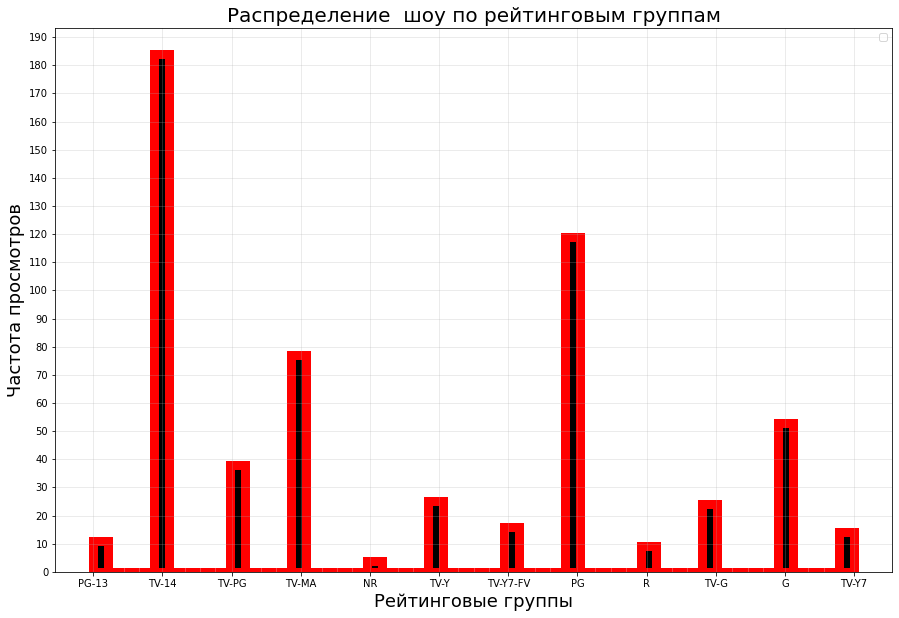

In [52]:
plt.figure(figsize = (15,10))
data['rating'].hist(color = "black", ec = "red",lw=9, bins=50)
plt.title('Распределение  шоу по рейтинговым группам', size = 20)
plt.xlabel('Рейтинговые группы', size =18)
plt.ylabel('Частота просмотров', size = 18)
plt.grid(alpha=0.3)
plt.locator_params (axis='x', nbins=46)
plt.locator_params (axis='y', nbins=21)
plt.legend()
plt.show()

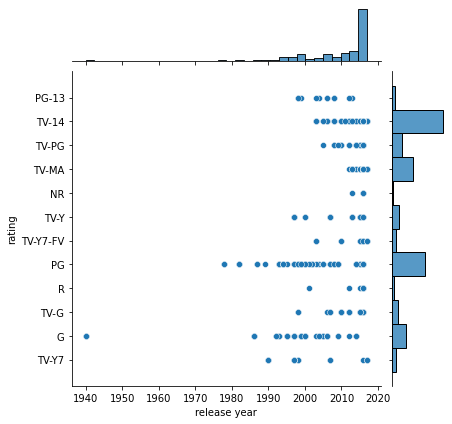

In [57]:

data.dropna(inplace=True)

sns.jointplot(x = "release year", y = "rating", data =data)

plt.show()

***Вывод:*** На столбчатой диграмме лучше просматривается популярность рейтинговых групп! TV-14 ,PG ,TV-MA ,G -эти рейтинговые группы наиболее популярны. Pg-13 ,R ,NR данные группы пользуются наименьшим спросом!

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [73]:
data.loc[3]

title                                                     Prison Break
rating                                                           TV-14
ratingLevel          Parents strongly cautioned. May be unsuitable ...
release year                                                      2008
user rating score                                                 98.0
Name: 3, dtype: object

***Вывод:*** Культовый американский драматический телесериал, созданный Полом Шойрингом. Всего было выпущено 4 сезона сериала с 2005 по 2009 год. Сериал закончился двухчасовым финалом, вышедшим на экраны 16 мая 2009 года. В 2017 году вышел пятый сезон сериала.Успех сериала породил множество и мерчандайзинговых явлений — производились съёмки коротких видео для мобильных телефонов, выпускалась печатная продукция в виде официального журнала и романа по сюжету сериала, была создана компьютерная игра по сюжету «Побега». Спин-офф мини-сериал «Prison Break: Proof of Innocence» был создан специально для скачивания для мобильных телефонов.
Для аудитории страше 14 лет!Максимальная пользовательская оценка - 98! С момента выпуска сериала вплоть до конца пятого сезона прослеживается стабильность в рейтиге.Это говорит о том что пользователи приковывались к экрану при выходе новой серии!Сериал удостаивался различных премий и также неоднократно бывал в номинациях!Тот случай когда хороший сюжет лучше любых спецэффектов!